<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03-Deep-Learning/notebooks/06-CNN-Practicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Redes Neuronales Convoluciones (CNN)</h1>

En esta notebook practicaremos el uso de las redes CNN en varios conjuntos de datos y realizaremos algunas comparaciones con las redes MLP.

Verifiquemos que el entorno de ejecución en Colab sea GPU

In [ ]:
import tensorflow as tf

print('GPU presente en: {}'.format(tf.test.gpu_device_name()))

GPU presente en: /device:GPU:0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# 1. MNIST Fashion

## El conjunto de datos

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
 <ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul>

Creamos un diccionario con los nombres de las clases

In [ ]:
prendas_list = ['Camiseta','Pantalones','Suéter','Vestido','Abrigo','Sandalia','Camisa','Sneaker','Bolsa','Botín']

prendas = dict(enumerate(prendas_list))
prendas

{0: 'Camiseta',
 1: 'Pantalones',
 2: 'Suéter',
 3: 'Vestido',
 4: 'Abrigo',
 5: 'Sandalia',
 6: 'Camisa',
 7: 'Sneaker',
 8: 'Bolsa',
 9: 'Botín'}

Cargamos del dataset

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train_classes), (X_test, y_test_classes) = fashion_mnist.load_data()

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train_classes.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test_classes.shape}")

4422102/4422102 [==============================] - 1s 0us/step
X train shape: (60000, 28, 28)
y train shape: (60000,)
X test shape: (10000, 28, 28)
y test shape: (10000,)


## Separación en Entrenamiento, Validación y Prueba

Obtenemos las clases como vectores *one-hot*

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train_classes, num_classes)
y_test = to_categorical(y_test_classes, num_classes)

Normalizamos

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Dividimos en train-validation-split

In [ ]:
# Las primeras 10,000 muestras para entrenamiento
X_train = X_train[:-10000]
y_train = y_train[:-10000]

# Reserva las últimas 10,000 muestras para validación
X_val = X_train[-10000:]
y_val = y_train[-10000:]

print('Train size:', X_train.shape[0])
print('Validation size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Train size: 50000
Validation size: 10000
Test size: 10000


Obtenemos una versión *aplanada* del dataset. Cada imagen de 28$\times$28 ahora es un vector de 784 componentes.

In [ ]:
X_train_flatten = X_train.reshape(-1, 784)
X_val_flatten = X_val.reshape(-1, 784)
X_test_flatten = X_test.reshape(-1, 784)

In [ ]:
print(X_train.shape,X_val.shape,X_test.shape)
print(X_train_flatten.shape,X_val_flatten.shape,X_test_flatten.shape)

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)
(50000, 784) (10000, 784) (10000, 784)


Visualicemos algunas imágenes

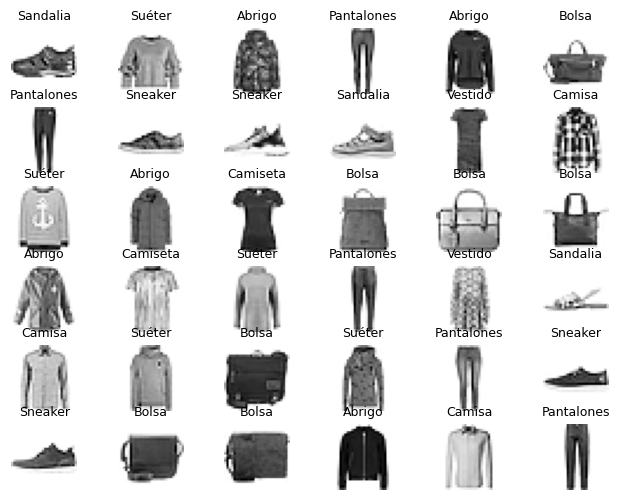

In [ ]:
# tamaño del conjunto de instancias
m = y_train.shape[0]

# Elegimos algunas instancias al azar para mostrar
random_idxs = np.random.choice(m, 36, replace=False)
images = X_train[random_idxs, :, :].reshape((6,6,28,28))
images_labels = y_train_classes[random_idxs].reshape((6,6))

# visualización de las imágenes
fig, axs = plt.subplots(6,6,figsize=(8,6))
for i in range(6):
    for j in range(6):
        axs[i,j].imshow(images[i,j], cmap='Greys')
        axs[i,j].set_title(prendas[images_labels[i,j]], fontsize=9)
        axs[i,j].axis('off')
fig.show()

## ⭕ Práctica 1

* Entrenar una red MLP para clasificar este conjunto de entrenamiento. Puedes escoger libremente el número de capas, neuronas, funciones de activación, optimizador y épocas. Ten cuidado con el sobre-entrenamiento.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.layers import Dense,Activation,Dropout,LeakyReLU
from tensorflow.keras.optimizers import RMSprop, SGD, RMSprop, Adagrad

model = Sequential()
model.add(Dense(25,input_dim=X_train_flatten.shape[1],activation=LeakyReLU(alpha=0.3)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 100)               2600      
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 23,235
Trainable params: 23,235
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/20
1563/1563 [==============================] - 14s 4ms/step - loss: 0.3264 - accuracy: 0.3407 - val_loss: 0.2591 - val_accuracy: 0.5606
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2254 - accuracy: 0.6188 - val_loss: 0.1977 - val_accuracy: 0.6497
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1804 - accuracy: 0.6664 - val_loss: 0.1646 - val_accuracy: 0.6887
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1551 - accuracy: 0.6982 - val_loss: 0.1454 - val_accuracy: 0.7204
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1398 - accuracy: 0.7227 - val_loss: 0.1333 - val_accuracy: 0.7326
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1298 - accuracy: 0.7396 - val_loss: 0.1253 - val_accuracy: 0.7515
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1229 - accuracy: 0.7519 - val_loss: 0.1190 - val_accuracy

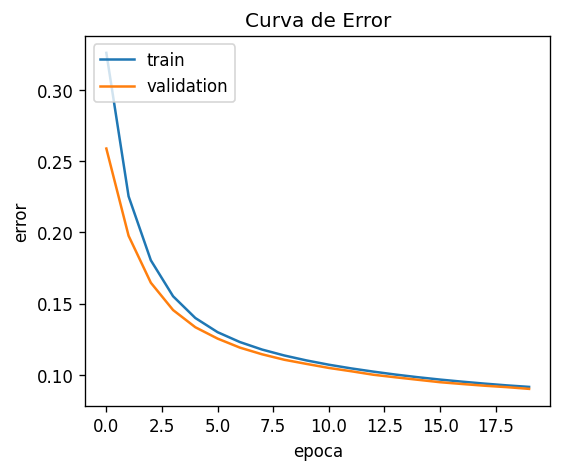

In [ ]:
EPOCAS = 20
BATCH  = 10

history = model.fit(X_train_flatten, y_train,
                    epochs=EPOCAS,
                    # batch_size=BATCH,
                    validation_data=(X_val_flatten, y_val),
                    verbose=1)

score = model.evaluate(X_test_flatten, y_test)
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))

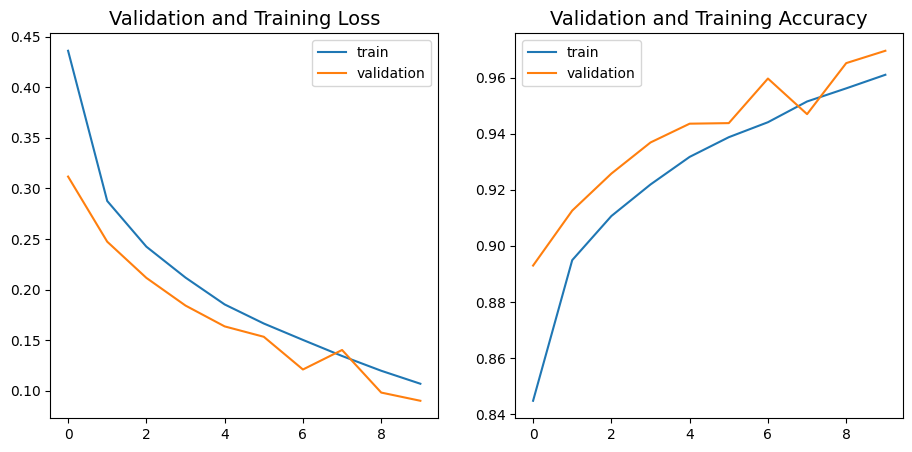

In [ ]:
# ---- graficamos la función de perdida ----
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# ---- graficamos la métrica de rendimiento ----
plt.subplot(1,2,2)
plt.title("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

Matriz de confusión

313/313 [==============================] - 1s 3ms/step


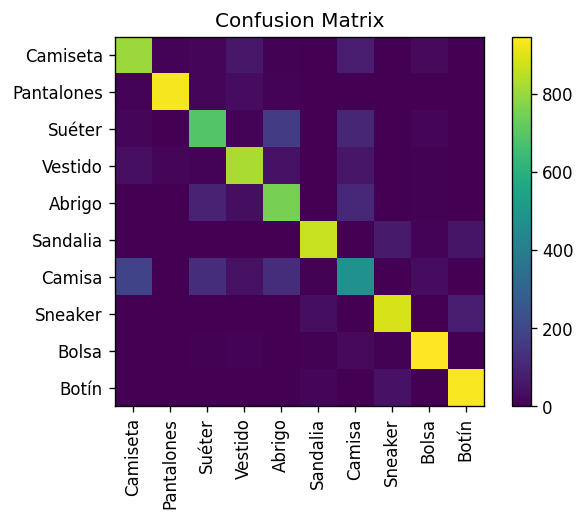

In [ ]:
from sklearn.metrics import confusion_matrix

y_hat = model.predict(X_test_flatten)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

## ⭕ Práctica 2

Entrenar una red CNN para la misma tarea de clasificación. Puedes escoger libremente el número de capas, neuronas, dropout, funciones de activación, optimizador y épocas. Ten cuidado con el sobre-entrenamiento.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.
* Compara el rendimiento de la MLP y la CNN.

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD



# Definimos la red CNN
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(X_train, y_train,
                    epochs=10,
					batch_size=32,
					validation_data=(X_val, y_val),
					verbose=1)

# evaluamos del modelo
score = model.evaluate(X_test, y_test)
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))

Epoch 1/10
1563/1563 [==============================] - 17s 5ms/step - loss: 0.4129 - accuracy: 0.8525 - val_loss: 0.3059 - val_accuracy: 0.8931
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2804 - accuracy: 0.8959 - val_loss: 0.2360 - val_accuracy: 0.9127
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2354 - accuracy: 0.9138 - val_loss: 0.1921 - val_accuracy: 0.9295
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2044 - accuracy: 0.9241 - val_loss: 0.1754 - val_accuracy: 0.9376
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1793 - accuracy: 0.9344 - val_loss: 0.1496 - val_accuracy: 0.9464
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1610 - accuracy: 0.9406 - val_loss: 0.1317 - val_accuracy: 0.9533
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1457 - accuracy: 0.9472 - val_loss: 0.1181 - val_accuracy

In [ ]:
from keras.layers import Dropout

# Definimos la red CNN
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='valid', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(19, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(X_train, y_train,
                    epochs=10,
					batch_size=32,
					validation_data=(X_val, y_val),
					verbose=1)

# evaluamos del modelo
score = model.evaluate(X_test, y_test)
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 0.4941 - accuracy: 0.8184 - val_loss: 0.3546 - val_accuracy: 0.8717
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3463 - accuracy: 0.8709 - val_loss: 0.3066 - val_accuracy: 0.8837
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3008 - accuracy: 0.8879 - val_loss: 0.2711 - val_accuracy: 0.9027
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2720 - accuracy: 0.8976 - val_loss: 0.2509 - val_accuracy: 0.9097
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2536 - accuracy: 0.9045 - val_loss: 0.2371 - val_accuracy: 0.9138
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2356 - accuracy: 0.9125 - val_loss: 0.2455 - val_accuracy: 0.9083
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2213 - accuracy: 0.9169 - val_loss: 0.2040 - val_accuracy

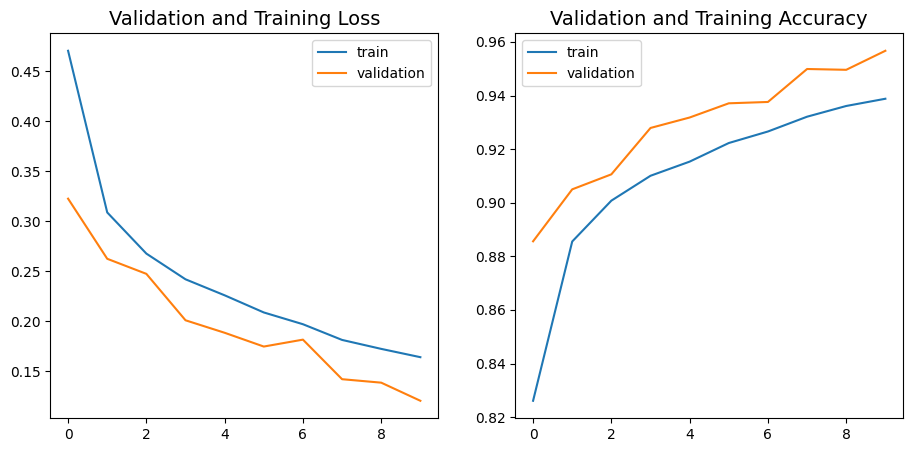

In [ ]:
# ---- graficamos la función de perdida ----
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# ---- graficamos la métrica de rendimiento ----
plt.subplot(1,2,2)
plt.title("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


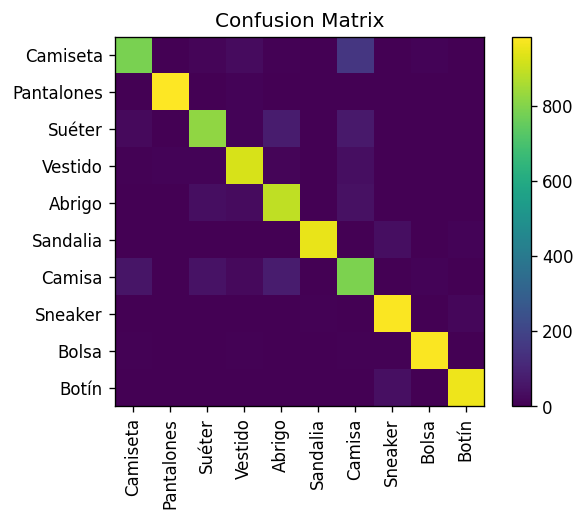

In [ ]:
from sklearn.metrics import confusion_matrix

y_hat = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

# Tarea 2: X-rays
































Este conjunto de entrenamiento consta de 5886 imágenes de rayos X de torax divididas en dos clases: Pneumonia y Normal.

Estas imágenes de radiografía de tórax son de pacientes pediátricos de uno a cinco años del Centro Médico de Mujeres y Niños de Guangzhou, Guangzhou. Todas las radiografías de tórax se realizaron como parte de la atención clínica rutinaria de los pacientes.

Para el análisis de las imágenes, se sometieron inicialmente a un control de calidad mediante la eliminación de todas las exploraciones de baja calidad o ilegibles. A continuación, los diagnósticos de las imágenes fueron calificados por dos médicos expertos antes de ser autorizados para el entrenamiento del sistema de IA. Para tener en cuenta cualquier error de clasificación, el conjunto de evaluación también fue revisado por un tercer experto.

Este conjunto de datos se puede encontrar en [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).

La copia con la que trabajaremos se puede bajar de Google Drive: https://drive.google.com/file/d/1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI/view?usp=sharing

In [ ]:
!pip install -q gdown

In [ ]:
!gdown 1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI

Downloading...
From: https://drive.google.com/uc?id=1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI
To: /content/x-rays.zip
100% 1.24G/1.24G [00:22<00:00, 55.0MB/s]


Extraemos los archivos

In [ ]:
from zipfile import ZipFile

fname = '/content/x-rays.zip'

with ZipFile(fname, 'r') as myzip:
    myzip.extractall()
    print('Listo')

Listo


Definimos las rutas de los archivos

In [ ]:
train_dir = 'x-rays/train'
validation_dir = 'x-rays/val'
test_dir = 'x-rays/test'

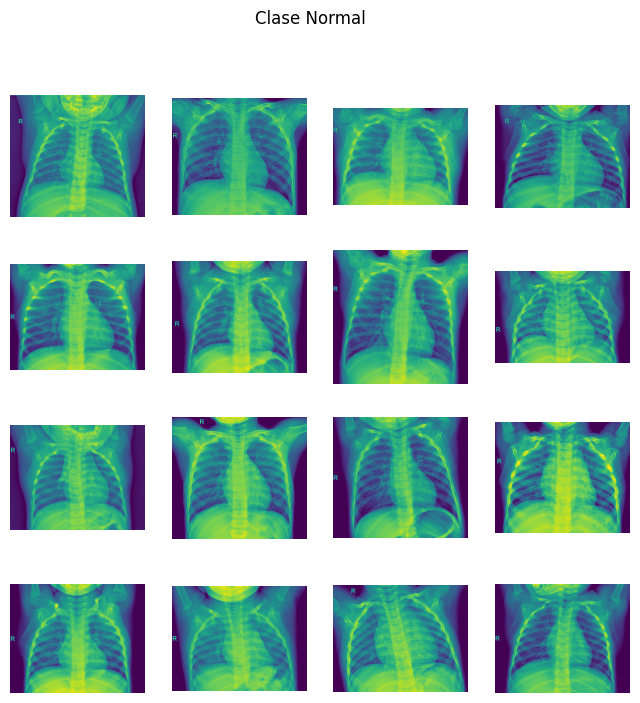

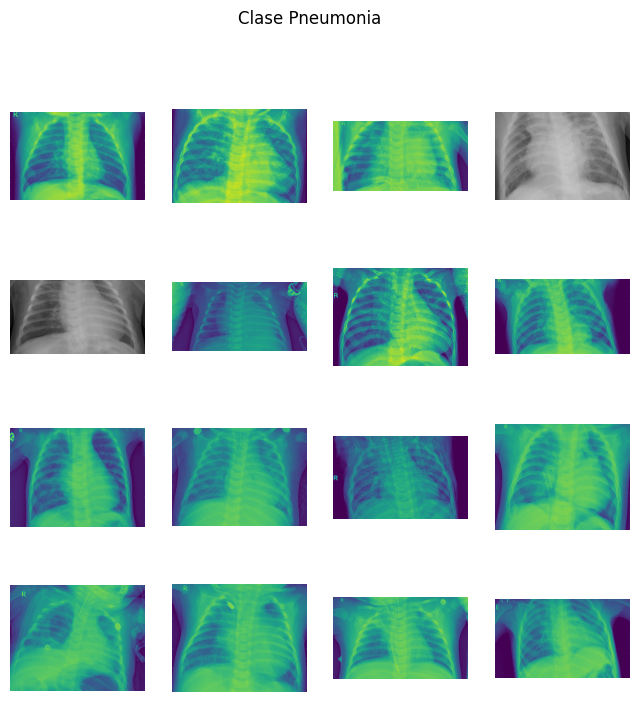

In [ ]:
import pathlib
import PIL

train_path = pathlib.Path(train_dir)
val_path = pathlib.Path(validation_dir)
test_path = pathlib.Path(test_dir)

normal_vis = list(train_path.glob("NORMAL/*.jpeg"))

plt.figure(figsize = (8,8))
plt.suptitle("Clase Normal")
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = PIL.Image.open(str(normal_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

normal_vis = list(train_path.glob("PNEUMONIA/*.jpeg"))

plt.figure(figsize = (8,8))
plt.suptitle("Clase Pneumonia")
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = PIL.Image.open(str(normal_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

In [ ]:
import os, shutil

print('Para entrenamiento:')
train_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(train_normal))))
train_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(train_pneumonia))))

print('\nPara validación:')
validation_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(validation_normal))))
validation_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(validation_pneumonia))))

print('\nPara prueba:')
test_normal = os.path.join(train_dir,'NORMAL')
print('{} Normal.'.format(len(os.listdir(test_normal))))
test_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print('{} Pneumonia.'.format(len(os.listdir(test_pneumonia))))

Para entrenamiento:
1341 Normal.
3875 Pneumonia.

Para validación:
1341 Normal.
3875 Pneumonia.

Para prueba:
1341 Normal.
3875 Pneumonia.


##  Solución 1: CNN pequeña

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    Conv2D(16, 3, activation='relu',
                           input_shape=(256,256, 3)),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256,256),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in validation_generator:
    print('Dimensiones del batch de imágenes:', data_batch.shape)
    print('Dimensiones del batch de las etiquetas:', labels_batch.shape)
    break

Dimensiones del batch de imágenes: (16, 256, 256, 3)
Dimensiones del batch de las etiquetas: (16,)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=163,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=1)

Epoch 1/15
163/163 [==============================] - 67s 403ms/step - loss: 2.4929 - accuracy: 0.8027 - val_loss: 0.3996 - val_accuracy: 0.6875
Epoch 2/15
163/163 [==============================] - 65s 398ms/step - loss: 0.1362 - accuracy: 0.9503 - val_loss: 0.1611 - val_accuracy: 1.0000
Epoch 3/15
163/163 [==============================] - 65s 402ms/step - loss: 0.0954 - accuracy: 0.9666 - val_loss: 1.2184 - val_accuracy: 0.5625
Epoch 4/15
163/163 [==============================] - 68s 415ms/step - loss: 0.0592 - accuracy: 0.9808 - val_loss: 0.3101 - val_accuracy: 0.8125
Epoch 5/15
163/163 [==============================] - 65s 400ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 6/15
163/163 [==============================] - 64s 394ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 7/15
163/163 [==============================] - 64s 393ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0086 - val_ac

In [ ]:
score = model.evaluate(test_generator)
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))

39/39 [==============================] - 6s 158ms/step - loss: 2.2491 - accuracy: 0.7564
Test loss: 2.249
Test accuracy: 75.64


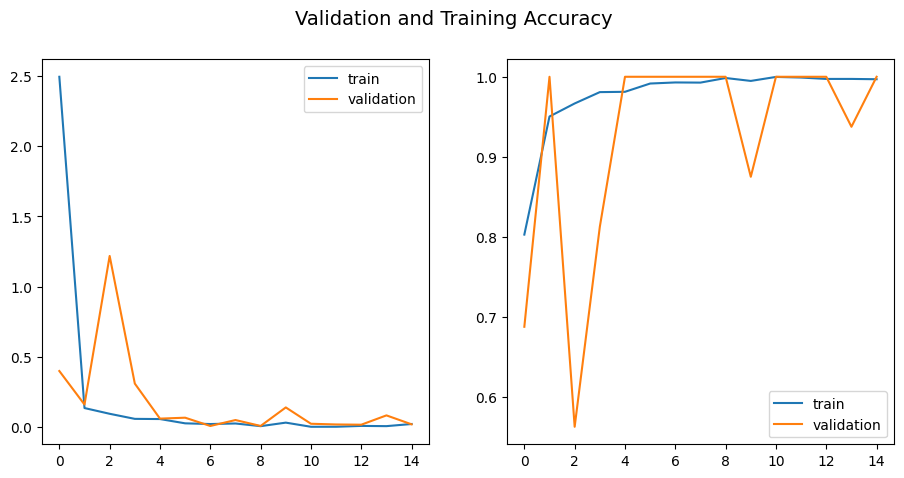

In [ ]:
import matplotlib.pyplot as plt

# ---- graficamos la función de perdida ----
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# ---- graficamos la métrica de rendimiento ----
plt.subplot(1,2,2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

## Solución 2: Mejor desesmpeño

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train_dir = 'x-rays/train'
validation_dir = 'x-rays/val'
test_dir = 'x-rays/test'

train = get_training_data(train_dir)
val = get_training_data(validation_dir)
test = get_training_data(test_dir)

<ipython-input-84-f7c995ea1462>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

Normalizamos el valor de pixeles entre 0 y 1

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

Usamos aumento de datos con `ImageDataGenerator`

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

La normalización de lotes `BatchNormalization` es una técnica para entrenar redes neuronales profundas que estandariza las entradas de una capa para cada minilote. Esto tiene el efecto de estabilizar el proceso de aprendizaje y reducir drásticamente el número de épocas de entrenamiento necesarias para entrenar redes profundas.

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)     

Se usa el *callback* `ReduceLROnPlateau`. Este callback reduce la tasa de aprendizaje cuando una métrica ha dejado de mejorar.

Los modelos a menudo se benefician de la reducción de la tasa de aprendizaje en un factor de 2-10 una vez que el aprendizaje se estanca. Este callback monitorea una cantidad y si no se ve ninguna mejora durante un número "paciente" de épocas, la tasa de aprendizaje se reduce.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 19s 85ms/step - loss: 0.6166 - accuracy: 0.8422 - val_loss: 31.5778 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 13s 82ms/step - loss: 0.2752 - accuracy: 0.8947 - val_loss: 48.6532 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2308 - accuracy: 0.9222
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 14s 84ms/step - loss: 0.2308 - accuracy: 0.9222 - val_loss: 13.2243 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 13s 82ms/step - loss: 0.1499 - accuracy: 0.9433 - val_loss: 35.6181 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 13s 82ms/step - loss: 0.1357 - accuracy: 0.9507 - val_loss: 0.4998 - val_accuracy: 0.6875 - lr: 3.0000e-04
Epoch 6/12
163/163 [======================

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 14ms/step - loss: 0.3243 - accuracy: 0.8638
Loss of the model is -  0.32431870698928833
20/20 [==============================] - 0s 14ms/step - loss: 0.3243 - accuracy: 0.8638
Accuracy of the model is -  86.37820482254028 %


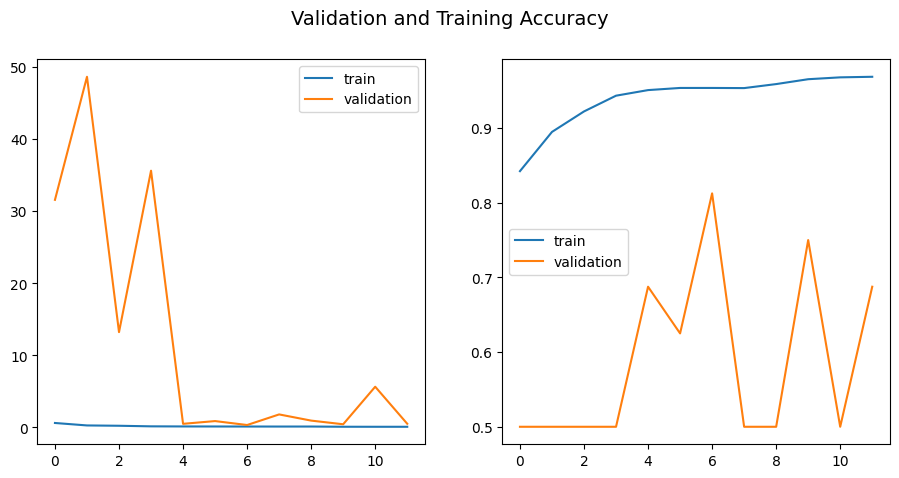

In [ ]:
# ---- graficamos la función de perdida ----
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.suptitle("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# ---- graficamos la métrica de rendimiento ----
plt.subplot(1,2,2)
plt.suptitle("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [ ]:
outputs = model.predict(x_test)
print(outputs.shape)
print(outputs[:10])

20/20 [==============================] - 0s 11ms/step
(624, 1)
[[1.1307156e-01]
 [7.6642716e-01]
 [2.4038088e-02]
 [2.8859198e-02]
 [3.7155747e-02]
 [1.6246395e-06]
 [7.7024731e-03]
 [7.6655278e-06]
 [1.0848791e-02]
 [1.1909539e-02]]


In [ ]:
predictions = np.round_(outputs)
predictions = predictions.reshape(-1,)
predictions[:10]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

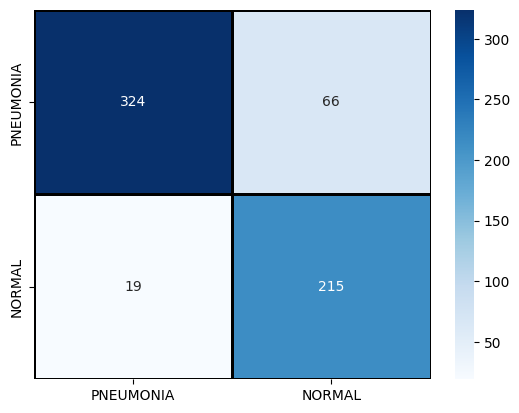

In [ ]:
cm = confusion_matrix(y_test,predictions)

plt.figure()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.show()